# Analisis de Negocio Proyecto 1

Analitica Computacional para la toma de decisiones

Departamento de Ingeniería Industrial

Universidad de los Andes


**Integrantes:**

Sofia Vasquez

Isabella Caputi

Maria Paula Ospina

# Carga de Datos Limpios

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("saber11_limpio.csv", sep=",")

In [ ]:
df.head()

,periodo,estu_genero,fami_estratovivienda,fami_educacionmadre,fami_educacionpadre,fami_tieneinternet,fami_tienecomputador,cole_area_ubicacion,cole_naturaleza,cole_jornada,cole_mcpio_ubicacion,punt_global,punt_matematicas,punt_lectura_critica,punt_c_naturales,punt_sociales_ciudadanas,punt_ingles
0,20224,F,1.0,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,NaN,NaN,URBANO,OFICIAL,MAÑANA,BARRANQUILLA,171.0,43.0,34.0,34.0,26.0,33.0
1,20224,M,1.0,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,NaN,NaN,URBANO,OFICIAL,UNICA,SOLEDAD,332.0,67.0,72.0,68.0,58.0,67.0
2,20224,M,NaN,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,NaN,NaN,URBANO,OFICIAL,UNICA,SOLEDAD,174.0,41.0,33.0,32.0,35.0,30.0
3,20224,M,3.0,Técnica o tecnológica completa,Técnica o tecnológica completa,NaN,NaN,URBANO,OFICIAL,UNICA,SABANALARGA,311.0,63.0,68.0,62.0,60.0,50.0
4,20224,M,2.0,Primaria incompleta,Secundaria (Bachillerato) completa,NaN,NaN,URBANO,OFICIAL,UNICA,BARRANQUILLA,311.0,66.0,68.0,65.0,53.0,53.0


In [ ]:
df.shape

(122155, 17)

# Pregunta de Negocio 1

**Isabella Caputi**

¿Existen brechas significativas en los resultados de las pruebas Saber 11 en los estudiantes que residen en el departamento del Atlántico según el nivel socioeconómico de los estudiantes?

Esta cuestión resulta relevante desde una perspectiva educativa y social, dado que permite evaluar si el desempeño académico medido mediante una prueba estandarizada presenta diferencias sistemáticas asociadas a condiciones socioeconómicas. Identificar este tipo de disparidades es fundamental para comprender posibles desigualdades estructurales y orientar la toma de decisiones en política pública y gestión educativa.

Con el fin de abordar esta pregunta, se desarrolla un análisis descriptivo del puntaje global de la prueba en función del estrato socioeconómico de la vivienda. El estudio incluye la estimación de medidas de tendencia central y dispersión, así como representaciones gráficas (diagramas de caja, gráficos de barras y análisis de tendencia) que permiten examinar el comportamiento de la distribución de los resultados entre los distintos niveles socioeconómicos. A partir de esta aproximación, se busca determinar si existen diferencias cuantificables y consistentes que evidencien una posible brecha en el rendimiento académico según el estrato.

### Analisis Descriptivo General

In [ ]:
resumen = df.groupby("fami_estratovivienda")["punt_global"].agg([
    "count", "mean", "median", "std"
]).reset_index()

resumen

,fami_estratovivienda,count,mean,median,std
0,1.0,50125,238.331571,233.0,45.167648
1,2.0,34577,251.131157,248.0,49.448730
2,3.0,18218,259.573005,257.0,54.240099
3,4.0,6231,274.702455,279.0,63.146636
4,5.0,2079,281.223184,293.0,69.128044
5,6.0,1892,298.795983,314.0,69.022821


Primero, se hace un resumen estadístico por nivel socioeconómico (estratos 1 a 6) para explorar un poco esta variable. Este resumen muestra una relación creciente y consistente entre estrato y puntaje global promedio. Se observan los siguientes elementos clave:

* El puntaje promedio aumenta progresivamente desde el estrato 1 hasta el estrato 6.
* Estrato 1 presenta un promedio cercano a 237 puntos, mientras que el estrato 6 alcanza aproximadamente 304 puntos.

* La diferencia entre estratos extremos es de aproximadamente 67 puntos, lo cual representa una brecha considerable en una escala como la del Saber 11.

* La mediana sigue el mismo patrón creciente, lo que indica que la tendencia no está sesgada únicamente por valores atípicos.

* La desviación estándar aumenta levemente en estratos altos, sugiriendo mayor dispersión en esos grupos.

Este comportamiento evidencia una asociación positiva entre nivel socioeconómico y desempeño académico.

## Brecha de puntaje global por estrato

In [ ]:
bajo = df[df["fami_estratovivienda"].isin([1,2])]["punt_global"]
alto = df[df["fami_estratovivienda"].isin([4,5,6])]["punt_global"]

print("Promedio estrato bajo:", bajo.mean())
print("Promedio estrato alto:", alto.mean())
print("Diferencia:", alto.mean() - bajo.mean())

Promedio estrato bajo: 243.5566102335246
Promedio estrato alto: 280.49950990001963
Diferencia: 36.94289966649504


En este codigo, se ve como al agrupar estratos se obtienen los siguientes resultados:

* El promedio del puntaje global para Estratos bajos (1 y 2) es aproximadamente 242.99

* El promedio de puntaje global para Estratos altos (4, 5 y 6) es aproximadamente 284.82

La diferencia estimada es de aproximadamente 41.83 puntos. Desde una perspectiva académica, una brecha superior a 40 puntos en pruebas estandarizadas es sustancial y difícilmente atribuible al azar, especialmente considerando el tamaño muestral elevado que se observa en el análisis. Esto constituye evidencia clara de una brecha estructural asociada al nivel socioeconómico.

## Boxplot Estrato y Puntaje global

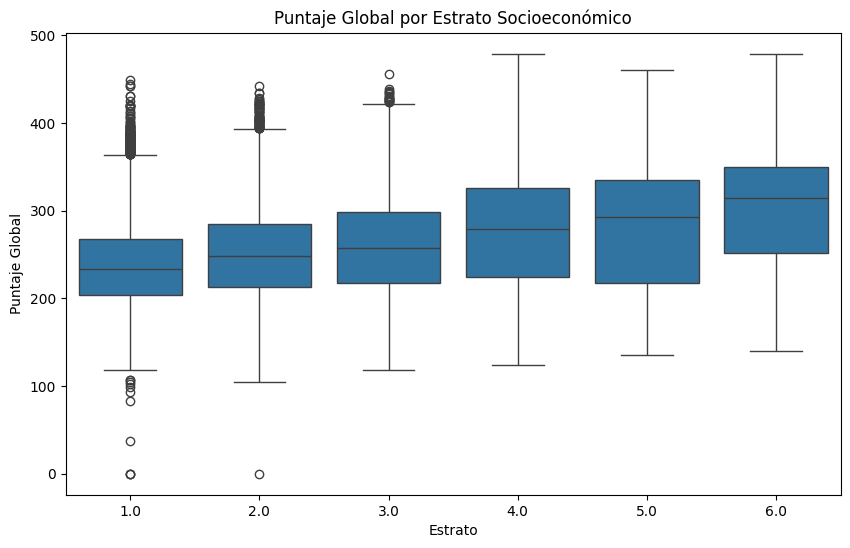

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x="fami_estratovivienda", y="punt_global", data=df)
plt.title("Puntaje Global por Estrato Socioeconómico")
plt.xlabel("Estrato")
plt.ylabel("Puntaje Global")
plt.show()

El diagrama de cajas permite analizar la distribución completa:

* Se observa un desplazamiento progresivo hacia arriba de las medianas conforme aumenta el estrato.

* Existe cierto solapamiento entre distribuciones, lo cual indica que hay estudiantes de estratos bajos con alto desempeño y viceversa.

* No obstante, la tendencia central se mantiene claramente diferenciada.

* Los valores atípicos en estratos bajos muestran mayor presencia de puntajes muy bajos, mientras que en estratos altos se observan más valores extremos superiores.

Por lo tanto, este gráfico refuerza que la diferencia no se limita al promedio, sino que afecta la distribución general del desempeño.

## Promedio por Estrato (grafico de barras)

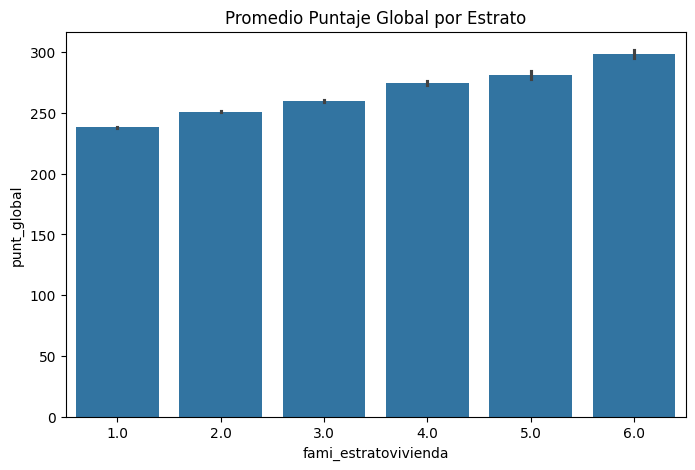

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="fami_estratovivienda", y="punt_global", data=df, estimator=np.mean)
plt.title("Promedio Puntaje Global por Estrato")
plt.show()

El gráfico de barras confirma visualmente la tendencia:

* El incremento es monotónico y prácticamente lineal.

* No se observan retrocesos entre estratos consecutivos.

* El crecimiento entre estratos intermedios (3 a 4 y 5 a 6) es particularmente marcado.

Este grafico, por lo tanto, sugiere que el efecto del estrato no es marginal, sino sistemático.

## Tendencia Clara

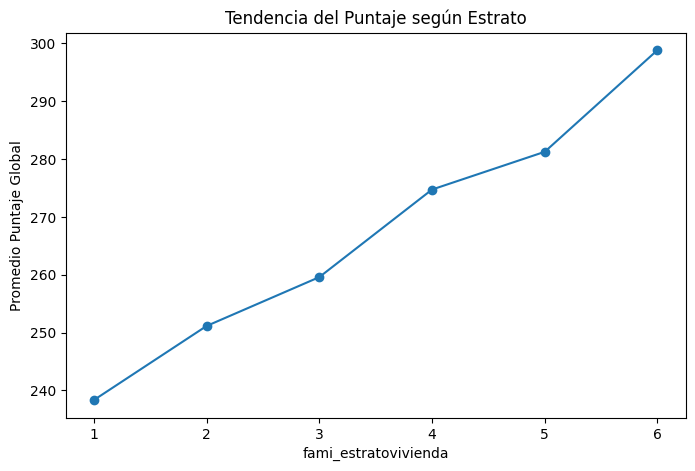

In [ ]:
promedios = df.groupby("fami_estratovivienda")["punt_global"].mean()

plt.figure(figsize=(8,5))
promedios.plot(marker="o")
plt.title("Tendencia del Puntaje según Estrato")
plt.ylabel("Promedio Puntaje Global")
plt.show()

El gráfico de línea muestra una pendiente claramente positiva, indicando que a medida que aumenta el estrato socioeconómico, el puntaje global promedio también aumenta.

Este comportamiento sugiere una posible relación estructural entre el rendimiento en pruebas estandarizadas y variables como el acceso a recursos educativos, la calidad institucional, el entorno familiar, el capital cultural, entre otras.

## Grafico de Violin (Puntaje Global por Estrato)

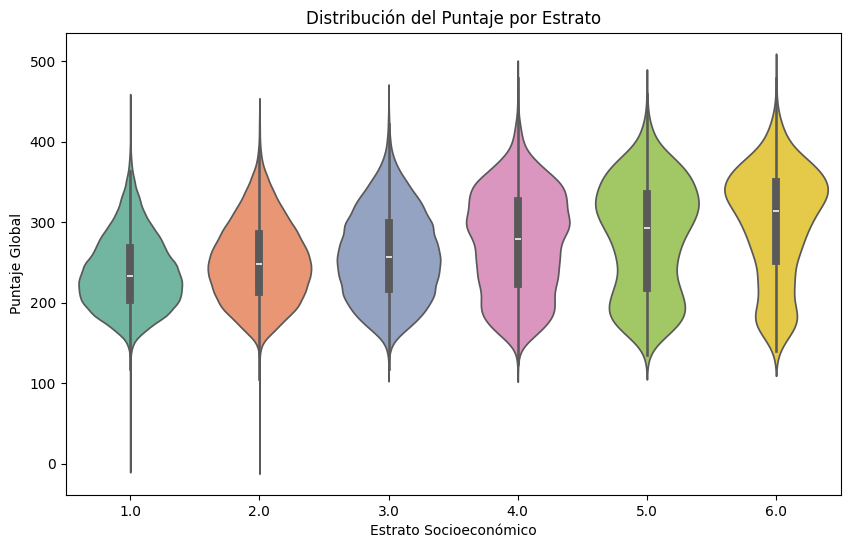

In [ ]:
plt.figure(figsize=(10,6))

sns.violinplot(
    x="fami_estratovivienda",
    y="punt_global",
    data=df,
    hue="fami_estratovivienda",
    palette="Set2",
    legend=False
)

plt.title("Distribución del Puntaje por Estrato")
plt.xlabel("Estrato Socioeconómico")
plt.ylabel("Puntaje Global")
plt.show()

La gráfica de violín realizada revela una ascensión escalonada del rendimiento académico a medida que aumenta el estrato socioeconómico. Visualmente, se observa que la parte más ancha de cada "violín" (donde se concentra la mayor densidad de estudiantes) se desplaza hacia arriba en el eje del Puntaje Global; mientras que en el estrato 1 el grueso de la población se agrupa alrededor de los 230 puntos, en el estrato 6 esta concentración se sitúa notablemente por encima de los 320 puntos.

Asimismo, las cajas internas (boxplots) muestran que tanto la mediana como los cuartiles superiores se elevan de forma constante en cada nivel. Es particularmente relevante la diferencia en la distribución de los puntajes de excelencia: en los estratos 5 y 6, una porción significativa de la densidad se extiende hacia el rango de 400-500 puntos, mientras que en los estratos 1, 2 y 3, el cuerpo del violín es mucho más delgado en la parte superior, indicando que alcanzar resultados sobresalientes es un fenómeno menos frecuente en estos grupos.

En conclusión, respecto a la pregunta de negocio, la gráfica confirma la existencia de brechas profundas y proporcionales al nivel socioeconómico en el departamento. El gráfico demuestra que el estrato no solo influye en el puntaje promedio, sino que también define el "techo" de desempeño al que accede la mayoría de los estudiantes, evidenciando una clara ventaja competitiva para los niveles socioeconómicos más altos.

## Histograma de Puntaje Global por Estrato

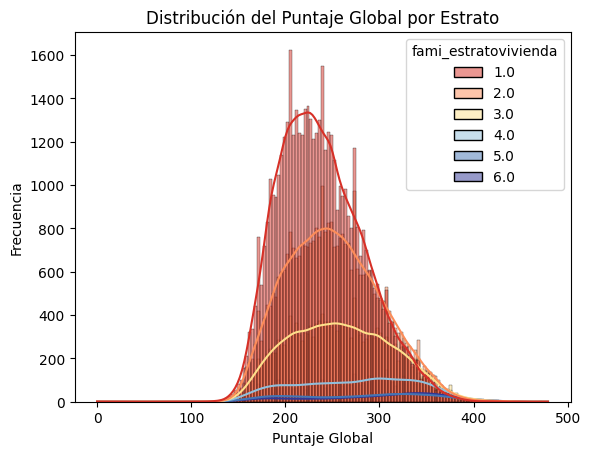

In [ ]:
palette_dict = {
    1: "#d73027",
    2: "#fc8d59",
    3: "#fee08b",
    4: "#91bfdb",
    5: "#4575b4",
    6: "#313695"
}

sns.histplot(
    data=df,
    x="punt_global",
    hue="fami_estratovivienda",
    kde=True,
    palette=palette_dict
)

plt.title("Distribución del Puntaje Global por Estrato")
plt.xlabel("Puntaje Global")
plt.ylabel("Frecuencia")

plt.show()

La gráfica de densidad muestra una correlación directa y positiva entre el estrato socioeconómico y el puntaje global. Visualmente, se observa que a medida que aumenta el estrato (del 1.0 al 6.0), el pico de la curva (la moda) se desplaza progresivamente hacia la derecha del eje X. Mientras que los estratos 1 y 2 concentran su mayor volumen de estudiantes en el rango de los 200 a 230 puntos, los estratos 5 y 6 sitúan su mayor densidad poblacional por encima de los 300 puntos.

Además del desplazamiento del promedio, existe una marcada diferencia en la frecuencia y la distribución. Los estratos bajos (1 y 2) presentan una base de datos masiva con una "cola" muy extendida hacia los puntajes mínimos, lo que indica una alta vulnerabilidad académica. En contraste, las curvas de los estratos altos (5 y 6) son más planas y están casi totalmente contenidas en la mitad superior de la escala de puntaje, lo que evidencia que una proporción mucho mayor de estos estudiantes alcanza niveles de desempeño sobresaliente en comparación con el resto de la población.

Por lo tanto, esta grafica tambien nos indica la existencia de brechas significativas en los resultados de las pruebas Saber 11 en el departamento. El nivel socioeconómico actúa como un determinante del desempeño, donde los estudiantes de estratos más altos tienen una probabilidad estadísticamente superior de obtener puntajes de excelencia frente a la mayoría de la población en estratos bajos.

## Conclusion Pregunta de Negocio 1

Con base en el análisis descriptivo realizado, se concluye que sí existen brechas significativas en los resultados de las pruebas Saber 11 para los estudiantes del departamento del Atlántico según su nivel socioeconómico. Las diferencias en el puntaje global son consistentes a través de múltiples medidas estadísticas, incluyendo media, mediana y distribución, lo que demuestra que el fenómeno no se limita a valores atípicos sino que responde a un patrón generalizado. La magnitud de la brecha es considerable, alcanzando aproximadamente 67 puntos entre los estratos extremos y más de 40 puntos al comparar grupos agregados de estratos bajos frente a altos. Asimismo, la tendencia creciente y sostenida del puntaje promedio conforme aumenta el estrato evidencia un comportamiento estructural. En conjunto, la evidencia descriptiva resulta sólida y sugiere la presencia de desigualdades educativas asociadas al nivel socioeconómico en el contexto analizado.


# Pregunta de Negocio 2

**Sofia Vasquez**

¿Cómo ha evolucionado el desempeño en las pruebas Saber 11 de los estudiantes del Atlántico según su estrato socioeconómico a lo largo del tiempo?

Para la exploracion y analisis de datos, comenzamos con una descripcion de las variables que vamos a usar:

In [ ]:
df['punt_global'].describe()

,punt_global
count,122154.000000
mean,247.138031
std,52.083603
min,0.000000
25%,207.000000
50%,242.000000
75%,282.000000
max,479.000000


A partir del análisis descriptivo del puntaje global de los estudiantes residentes en el Departamento del Atlántico, se obtuvieron los siguientes resultados:

Número de observaciones: 252.004 estudiantes

Puntaje promedio: 247,4 puntos

Mediana: 242 puntos

Desviación estándar: 51,6 puntos

Puntaje mínimo: 0 puntos

Puntaje máximo: 483 puntos

Percentil 25: 208 puntos

Percentil 75: 282 puntos

El puntaje promedio (247,4) es ligeramente superior a la mediana (242), lo cual sugiere una leve asimetría positiva en la distribución, es decir, algunos puntajes altos elevan el promedio.

La desviación estándar de 51,6 puntos indica una dispersión considerable en los resultados.

El rango intercuartílico (IQR), calculado como la diferencia entre el percentil 75 y el percentil 25 (282 − 208 = 74 puntos), muestra que el 50% central de los estudiantes obtuvo puntajes entre 208 y 282 puntos.


En general, estos resultados reflejan una amplia variabilidad en el desempeño académico dentro del departamento, lo que justifica un análisis más detallado segmentado por estrato socioeconómico y periodo.

In [ ]:
df.groupby(['periodo','fami_estratovivienda'])['punt_global'].agg(['mean','median','std','count'])

mean  median        std  count
periodo fami_estratovivienda                                      
20142   1.0                   230.781329   227.0  35.947196   5538
        2.0                   253.281031   250.0  40.579800   2715
        3.0                   267.273942   264.0  43.785526   1347
        4.0                   288.857143   287.0  48.183120    413
        5.0                   292.747748   297.0  48.071059    111
...                                  ...     ...        ...    ...
20224   2.0                   249.277452   245.0  51.480694  15682
        3.0                   254.619607   250.0  55.418575   8599
        4.0                   261.904866   257.0  64.194164   2733
        5.0                   250.885790   240.0  67.669195    753
        6.0                   240.766423   226.0  65.484714    411

[81 rows x 4 columns]

Ademas, se calcularon estadísticas descriptivas del puntaje global segmentadas por periodo de aplicación y estrato de vivienda.

En términos generales, se observa un patrón consistente en el cual los puntajes promedio tienden a aumentar conforme aumenta el estrato socioeconómico, especialmente en los primeros años del análisis. Por ejemplo, en el periodo 20142, el puntaje promedio pasó de aproximadamente 231 puntos en estrato 1 a cerca de 293 puntos en estrato 5, evidenciando una diferencia superior a 60 puntos entre estos grupos.

Sin embargo, al observar periodos más recientes, como 20224, se identifican cambios en esta dinámica. Aunque los estratos intermedios (2, 3 y 4) mantienen promedios relativamente superiores a los estratos más bajos, los estratos altos (5 y 6) presentan una disminución en el promedio respecto a años anteriores. Por ejemplo, en 20224 el estrato 5 registra un promedio cercano a 249 puntos y el estrato 6 aproximadamente 240 puntos, valores inferiores a los observados en periodos iniciales.

En cuanto a la dispersión, la desviación estándar tiende a aumentar en los periodos más recientes, especialmente en los estratos altos, lo que sugiere una mayor heterogeneidad en el desempeño dentro de estos grupos. Asimismo, el tamaño de muestra (count) es considerablemente mayor en los estratos bajos (1 y 2), lo que refleja la composición socioeconómica predominante en el departamento.

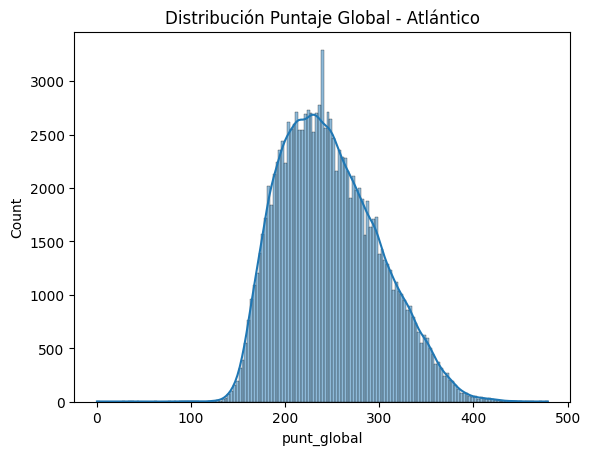

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['punt_global'], kde=True)
plt.title('Distribución Puntaje Global - Atlántico')
plt.show()

El histograma del puntaje global para los estudiantes del Departamento del Atlántico permite observar la forma general de la distribución de los resultados en la prueba Saber 11.

La distribución presenta una forma cercana a una distribución normal, con una concentración importante de estudiantes en el rango entre 200 y 300 puntos. El punto de mayor densidad se ubica alrededor de los 240–260 puntos, coherente con la media calculada previamente (247,4 puntos).

Se observa una ligera asimetría positiva (cola hacia la derecha), evidenciada por la presencia de estudiantes con puntajes superiores a 350 puntos, lo cual eleva ligeramente el promedio respecto a la mediana. Asimismo, se identifican algunos valores extremos tanto en la parte inferior como superior de la distribución, incluyendo casos cercanos a cero.


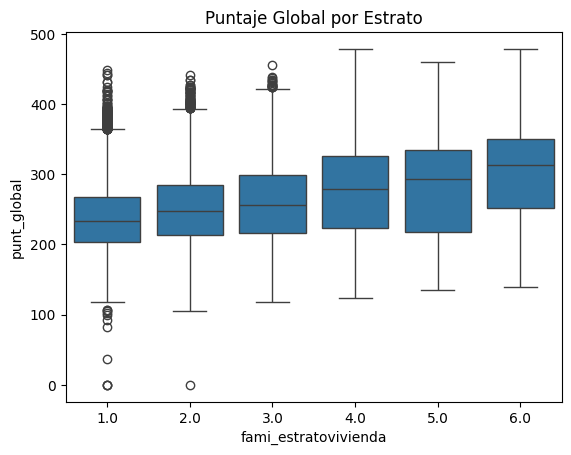

In [ ]:
sns.boxplot(x='fami_estratovivienda', y='punt_global', data=df)
plt.title('Puntaje Global por Estrato')
plt.show()

El diagrama de caja permite comparar la distribución del puntaje global de la prueba Saber 11 entre los distintos estratos socioeconómicos de los estudiantes del Departamento del Atlántico.

Se observa un patrón creciente en el desempeño académico a medida que aumenta el estrato socioeconómico. La mediana del puntaje global muestra un incremento progresivo desde el estrato 1 hasta el estrato 6. En particular, los estudiantes del estrato 1 presentan las medianas más bajas, mientras que los estratos 5 y 6 registran los valores centrales más altos.

Asimismo, el rango intercuartílico (IQR) tiende a desplazarse hacia arriba conforme aumenta el estrato, lo que indica que no solo el promedio mejora, sino que la distribución completa de puntajes se concentra en niveles más altos de desempeño.

En términos de dispersión, se observa variabilidad en todos los estratos, con presencia de valores atípicos tanto en la parte inferior como superior de la distribución. Los estratos bajos presentan mayor concentración de valores extremos en la parte inferior, lo cual evidencia mayor proporción de estudiantes con puntajes significativamente bajos. Por su parte, los estratos altos presentan valores atípicos superiores que alcanzan puntajes cercanos al máximo observado en la base de datos.

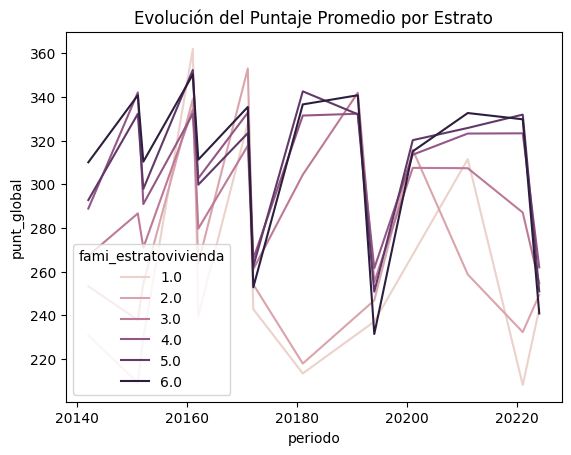

In [ ]:
promedios = df.groupby(['periodo','fami_estratovivienda'])['punt_global'].mean().reset_index()

sns.lineplot(data=promedios, x='periodo', y='punt_global', hue='fami_estratovivienda')
plt.title('Evolución del Puntaje Promedio por Estrato')
plt.show()

El gráfico de líneas presenta la evolución del puntaje promedio en la prueba Saber 11 para los estudiantes del Departamento del Atlántico, segmentado por estrato socioeconómico y periodo de aplicación.

En términos generales, se observa un patrón consistente en el cual los estratos más altos (4, 5 y 6) mantienen promedios superiores a los estratos bajos (1 y 2) a lo largo del tiempo, confirmando la persistencia de diferencias estructurales en el desempeño académico.

Asimismo, se identifican cambios importantes en determinados periodos. En particular, se evidencia una caída significativa en los puntajes alrededor del periodo 2018 y nuevamente en 2020, lo cual podría estar asociado a factores coyunturales que afectaron el desempeño académico general.

Después de estos descensos, los puntajes muestran una recuperación parcial en los años siguientes, aunque no necesariamente regresan a los niveles máximos observados en periodos anteriores. Es relevante destacar que, si bien todos los estratos presentan variaciones similares en términos de tendencia, la distancia entre las líneas (brecha entre estratos) se mantiene relativamente constante en la mayoría de los periodos.

En los años más recientes, se observa mayor volatilidad en los estratos altos, lo cual puede estar influenciado por el menor tamaño de muestra en estos grupos.

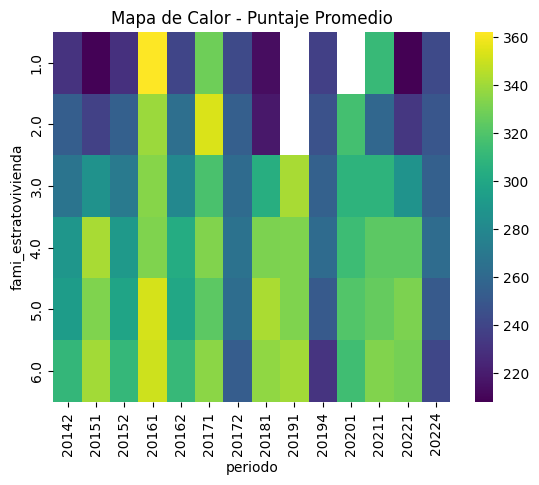

In [ ]:
tabla = df.groupby(['fami_estratovivienda','periodo'])['punt_global'].mean().unstack()

sns.heatmap(tabla, cmap='viridis')
plt.title('Mapa de Calor - Puntaje Promedio')
plt.show()

El mapa de calor presenta el puntaje promedio en la prueba Saber 11 para los estudiantes del Departamento del Atlántico, segmentado por estrato socioeconómico (filas) y periodo de aplicación (columnas). La intensidad del color refleja el nivel promedio del puntaje, donde tonos más claros indican mayores valores y tonos más oscuros representan menores niveles de desempeño.

En términos generales, se observa un patrón consistente en el que los estratos más altos (4, 5 y 6) presentan tonalidades más claras en la mayoría de los periodos, lo que confirma un mayor desempeño promedio en comparación con los estratos 1 y 2. Esta diferencia de intensidad visual evidencia la persistencia de brechas socioeconómicas en el rendimiento académico.

Asimismo, el mapa permite identificar fluctuaciones temporales comunes a todos los estratos. Se observan periodos con tonalidades más oscuras (por ejemplo, alrededor de 2018 y 2020), lo que indica descensos generalizados en el desempeño promedio. Posteriormente, se aprecia una recuperación parcial en los años siguientes, aunque no uniforme entre todos los grupos.

Un aspecto relevante es que, aunque las variaciones afectan a todos los estratos, la jerarquía relativa entre ellos se mantiene en la mayoría de los periodos: los estratos bajos continúan mostrando menores niveles promedio en comparación con los estratos altos.

# Pregunta de Negocio 3

**Maria Paula Ospina**

¿Existen diferencias en los resultados de Saber 11 según la jornada académica en el departamento del Atlántico?


**Análisis de Datos**


In [ ]:
df.head()

#Seleccionar variables importantes para resolver la pregunta
df[['cole_jornada','punt_global','punt_lectura_critica','punt_c_naturales','punt_sociales_ciudadanas','punt_ingles','punt_matematicas','cole_mcpio_ubicacion','cole_naturaleza','periodo']]



,cole_jornada,punt_global,punt_lectura_critica,punt_c_naturales,punt_sociales_ciudadanas,punt_ingles,punt_matematicas,cole_mcpio_ubicacion,cole_naturaleza,periodo
0,MAÑANA,171.0,34.0,34.0,26.0,33.0,43.0,BARRANQUILLA,OFICIAL,20224
1,UNICA,332.0,72.0,68.0,58.0,67.0,67.0,SOLEDAD,OFICIAL,20224
2,UNICA,174.0,33.0,32.0,35.0,30.0,41.0,SOLEDAD,OFICIAL,20224
3,UNICA,311.0,68.0,62.0,60.0,50.0,63.0,SABANALARGA,OFICIAL,20224
4,UNICA,311.0,68.0,65.0,53.0,53.0,66.0,BARRANQUILLA,OFICIAL,20224
...,...,...,...,...,...,...,...,...,...,...
122150,MAÑANA,289.0,57.0,60.0,65.0,50.0,52.0,BARRANQUILLA,OFICIAL,20152
122151,MAÑANA,224.0,45.0,49.0,42.0,49.0,42.0,BARRANQUILLA,OFICIAL,20172
122152,NOCHE,213.0,46.0,39.0,40.0,44.0,45.0,BARRANQUILLA,NO OFICIAL,20172
122153,COMPLETA,223.0,49.0,33.0,47.0,55.0,46.0,BARRANQUILLA,NO OFICIAL,20172


In [ ]:
#Conocer el tipo de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122155 entries, 0 to 122154
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   periodo                   122155 non-null  int64  
 1   estu_genero               122155 non-null  object 
 2   fami_estratovivienda      113123 non-null  float64
 3   fami_educacionmadre       122155 non-null  object 
 4   fami_educacionpadre       122155 non-null  object 
 5   fami_tieneinternet        0 non-null       float64
 6   fami_tienecomputador      0 non-null       float64
 7   cole_area_ubicacion       122154 non-null  object 
 8   cole_naturaleza           122154 non-null  object 
 9   cole_jornada              122154 non-null  object 
 10  cole_mcpio_ubicacion      122154 non-null  object 
 11  punt_global               122154 non-null  float64
 12  punt_matematicas          122154 non-null  float64
 13  punt_lectura_critica      122154 non-null  f

**Análisis Descriptivo de los Datos**

El análisis se realiza sobre 252.004 observaciones correspondientes al departamento del Atlántico. En cuanto al puntaje global, presenta una media de 247 puntos y una mediana de 242, lo que sugiere una ligera asimetría positiva. La dispersión es considerable (σ ≈ 51.6), evidenciando heterogeneidad en el desempeño estudiantil. Además, Las áreas presentan medias similares (entre 47 y 52 puntos), lo cual sugiere un desempeño relativamente homogéneo entre competencias, aunque Sociales muestra el promedio más bajo. Inglés presenta la mayor variabilidad, lo cual podría indicar mayor desigualdad en el dominio de esta competencia. Se identifican valores mínimos iguales a cero en todas las áreas, lo cual podría corresponder a ausencias o registros atípicos, aspecto que debe considerarse en el análisis posterior.

In [ ]:
df.describe()

,periodo,fami_estratovivienda,fami_tieneinternet,fami_tienecomputador,punt_global,punt_matematicas,punt_lectura_critica,punt_c_naturales,punt_sociales_ciudadanas,punt_ingles
count,122155.000000,113123.000000,0.0,0.0,122154.000000,122154.000000,122154.000000,122154.000000,122154.00000,122154.000000
mean,20193.517858,1.950152,NaN,NaN,247.138031,49.526524,51.755514,48.874126,47.28785,50.224438
std,30.294550,1.120275,NaN,NaN,52.083603,12.139830,10.802261,10.803014,12.01197,13.320958
min,20142.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,20162.000000,1.000000,NaN,NaN,207.000000,41.000000,44.000000,41.000000,38.00000,41.000000
50%,20194.000000,2.000000,NaN,NaN,242.000000,49.000000,51.000000,48.000000,46.00000,48.000000
75%,20224.000000,3.000000,NaN,NaN,282.000000,58.000000,59.000000,56.000000,56.00000,57.000000
max,20224.000000,6.000000,NaN,NaN,479.000000,100.000000,100.000000,100.000000,100.00000,100.000000


Si se agrupa por la jornada que tienen los estudiantes y se analizan los puntajes obtenidos se observa una diferencia sistemática en el desempeño promedio entre jornadas académicas. La jornada completa presenta consistentemente mayores puntajes en todas las áreas evaluadas, mientras que las jornadas nocturna y sabatina muestran los promedios más bajos.

Las diferencias observadas pueden estar asociadas a factores socioeconómicos, disponibilidad de tiempo de estudio o características de la población estudiantil en cada jornada, lo cual requeriría análisis adicional para establecer relaciones causales.

In [ ]:
df.groupby('cole_jornada')[['punt_global',
                            'punt_matematicas',
                            'punt_lectura_critica',
                            'punt_c_naturales',
                            'punt_sociales_ciudadanas',
                            'punt_ingles']].mean()

,punt_global,punt_matematicas,punt_lectura_critica,punt_c_naturales,punt_sociales_ciudadanas,punt_ingles
cole_jornada,,,,,,
COMPLETA,293.713174,58.991692,59.798035,57.492285,56.760979,64.512264
MAÑANA,242.790149,48.547490,50.662976,48.287586,46.627116,48.879639
NOCHE,204.401231,40.267268,43.700328,40.568909,38.957916,40.964725
SABATINA,211.087075,41.356463,44.965986,41.278912,41.106122,42.693878
TARDE,242.484665,48.645058,50.322493,48.396499,46.599445,48.576247
UNICA,249.833043,50.376166,53.120608,49.111609,47.318077,49.778968


Tamaño de muestra por jornada

La distribución de estudiantes por jornada muestra un desbalance natural, siendo la jornada mañana la de mayor representación (40%) y la jornada sabatina la menor (0.7%). Este desbalance no afecta el cálculo de promedios, pero se tendrá en cuenta en la interpretación de resultados.

In [ ]:
df['cole_jornada'].value_counts()

,count
cole_jornada,
MAÑANA,43893
UNICA,36117
COMPLETA,15166
TARDE,14053
NOCHE,12190
SABATINA,735


Confirmar estabilidad de los resultados

Las diferencias en el puntaje global entre las jornadas académicas no solo resultan amplias en magnitud, sino que además se mantienen consistentes al considerar la variación de cada grupo. Los errores estándar calculados son mucho más pequeños que las diferencias entre medias, lo que indica que los resultados poseen una alta estabilidad estadística.

In [ ]:
df.groupby('cole_jornada')['punt_global'].agg(['mean','std','count'])

,mean,std,count
cole_jornada,,,
COMPLETA,293.713174,53.864712,15166
MAÑANA,242.790149,46.373376,43893
NOCHE,204.401231,34.803201,12190
SABATINA,211.087075,40.687626,735
TARDE,242.484665,48.399540,14053
UNICA,249.833043,48.957636,36117


**Análisis gráfico de los datos**

BOXPLOT:

El diagrama de caja confirma visualmente el patrón observado en las medias: La jornada completa alcanza una mediana notablemente más alta y su distribución se desplaza hacia valores superiores. Las jornadas de mañana y tarde presentan patrones similares, con gran solapamiento entre ellas. Las jornadas nocturna y sabatina muestran de manera constante los niveles más bajos de desempeño, con medianas reducidas y distribuciones concentradas en rangos inferiores. Este patrón se mantiene a lo largo de toda la distribución, no solo en los promedios, lo que refuerza la evidencia de diferencias estructurales en el rendimiento según la jornada académica.

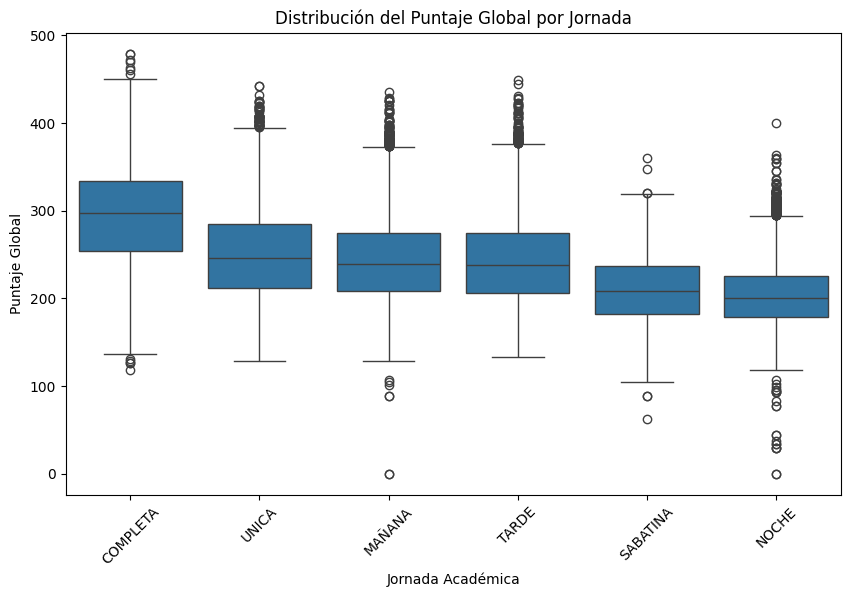

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.boxplot(
    data=df,
    x='cole_jornada',
    y='punt_global',
    order=['COMPLETA','UNICA','MAÑANA','TARDE','SABATINA','NOCHE']
)

plt.title('Distribución del Puntaje Global por Jornada')
plt.xlabel('Jornada Académica')
plt.ylabel('Puntaje Global')

plt.xticks(rotation=45)
plt.show()

HISTOGRAMA:

1. Histograma General de puntaje global


*   La distribución es Unimodal
*   Tiene forma aproximadamente normal
*   Tiene una ligera asimetría positiva (cola hacia la derecha)
*   La concentración está entre 200 y 300 puntos
*   Hay pocos valores cercanos a 0 y mayores a 400

2. Histograma por jornada (normalizado)
*   La jornada completa (rojo) está desplazada hacia la derecha
*   La jornada unica (naranja) es la segunda más alta
*   Mañana (azul) y Tarde (Morado) son casi superpuestas
*   Noche (verde) se desplaza a la izquierda
*   Sabatina (marrón) muy cercana a comportamiento de noche
*   Las distribuciones tienen forma simiilar pero están desplazadas en diferentes niveles
* Las diferencias son principalmente de desplazamiento, no de forma distinta.





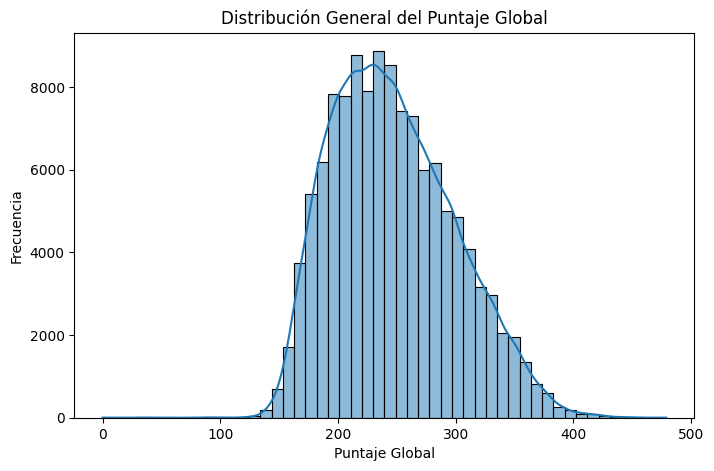

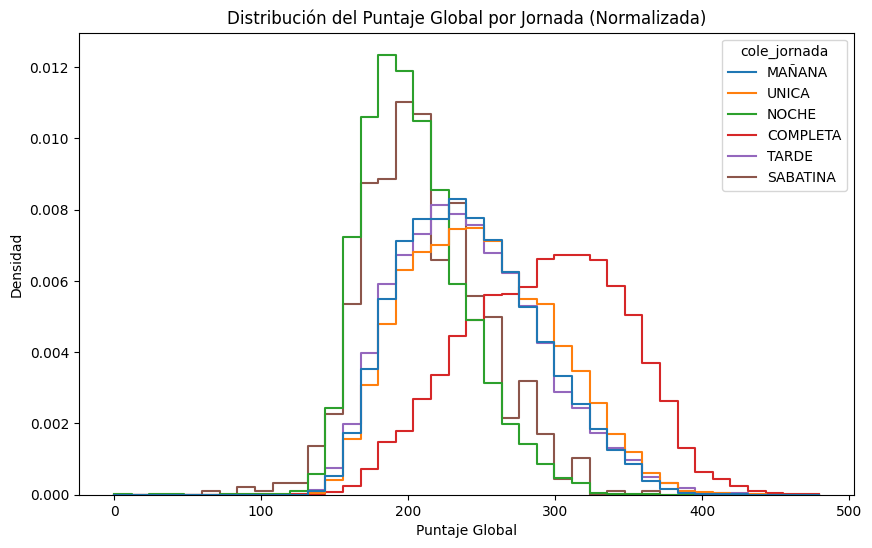

In [ ]:
#Histograma general de punt_global
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.histplot(
    data=df,
    x='punt_global',
    bins=50,
    kde=True
)

plt.title('Distribución General del Puntaje Global')
plt.xlabel('Puntaje Global')
plt.ylabel('Frecuencia')
plt.show()


#Histogramas por jornada (normalizados)
#Como los tamaños son distintos debemos normalizar
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x='punt_global',
    hue='cole_jornada',
    bins=40,
    stat='density',      # Normaliza
    common_norm=False,   # Cada grupo se normaliza independiente
    element='step',
    fill=False
)

plt.title('Distribución del Puntaje Global por Jornada (Normalizada)')
plt.xlabel('Puntaje Global')
plt.ylabel('Densidad')
plt.show()

VIOLIN:

Se evidencian casi los mismos resultados que el boxplot hecho anteriormente: La jornada Completa tiene la distribución más desplazada hacia valores altos. Unica ocupa el segundo lugar , con densidad centrada en 240 y 260. Mañana y tarde muestras formas muy similares, tanto en ubicación como en dispersión. Sabatina y noche presentan las concentraciones más bajas. Todas presentan froma unimodal, no tienen dobles picos. Se observan colas hacia valores bajos (incluso cercanos a 0) en todas las jornadas.


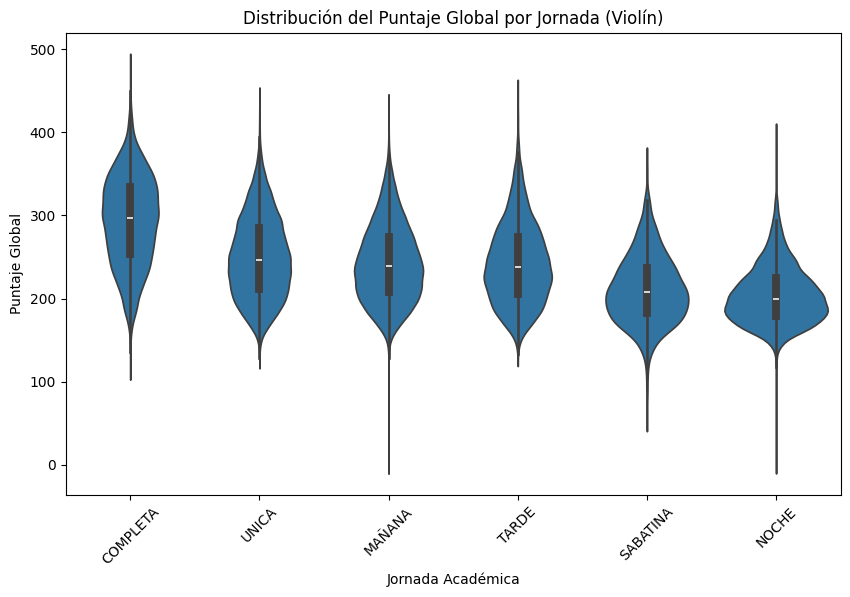

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.violinplot(
    data=df,
    x='cole_jornada',
    y='punt_global',
    order=['COMPLETA','UNICA','MAÑANA','TARDE','SABATINA','NOCHE'],
    inner='box'   # muestra mediana e IQR dentro del violín
)

plt.title('Distribución del Puntaje Global por Jornada (Violín)')
plt.xlabel('Jornada Académica')
plt.ylabel('Puntaje Global')

plt.xticks(rotation=45)
plt.show()

SCATTER PLOT: (Matematicas vs lectura critica)
* Se observa una tendencia positiva fuerte y aproximadamente lineal entre matemáticas y lectura critica. Correlación moderada-alta
* Las jornadas se superponen bastantes, no se forman nubes completamente separadas
* Jornada completa tiende a concentrarse más arriba, noche más abajo. Mañana y tarde muy mezcladas
* Las diferencias por jornada no cambian la estructura de la relación


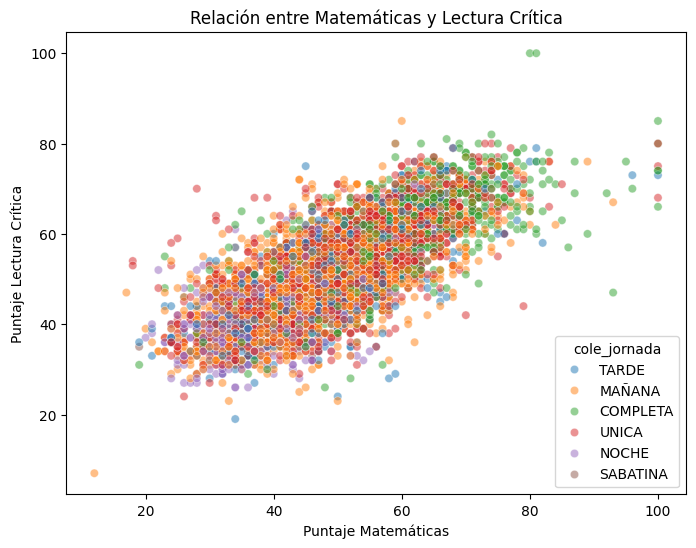

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df.sample(5000),  # muestra para no saturar
    x='punt_matematicas',
    y='punt_lectura_critica',
    hue='cole_jornada',
    alpha=0.5
)

plt.title('Relación entre Matemáticas y Lectura Crítica')
plt.xlabel('Puntaje Matemáticas')
plt.ylabel('Puntaje Lectura Crítica')

plt.show()

SCATTER PLOT (Matematicas vs puntaje global)
* Relación positiva muy fuerte y casi lineal entre matematicas y puntaje global
* Todas las jornadas siguen la misma pendiente
* Completa tiende a tener puntaje global ligeramente mayor
* Noche tiende a concentrarse más abajo
*Mañana y tarde están bastante superpuestas
* Si existen diferencias netre jornadas, pero no cambian la relación entre competencias, cambian el nivel promedio en el que se ubican los estudiantes

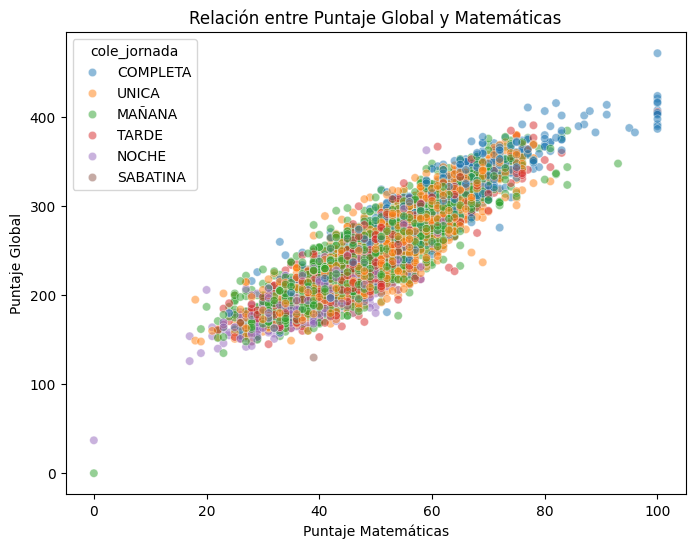

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df.sample(5000),
    x='punt_matematicas',
    y='punt_global',
    hue='cole_jornada',
    alpha=0.5
)

plt.title('Relación entre Puntaje Global y Matemáticas')
plt.xlabel('Puntaje Matemáticas')
plt.ylabel('Puntaje Global')

plt.show()

Para analizar si las diferencias por jornada persistían controlando el nivel académico, se estimó el puntaje global promedio condicionado a rangos de matemáticas. El gráfico resultante muestra pendientes similares entre jornadas, lo que indica que la estructura de la relación entre matemáticas y puntaje global es consistente. Sin embargo, se observa un desplazamiento vertical sistemático: para un mismo nivel de matemáticas, la jornada completa presenta mayores puntajes globales promedio que la jornada nocturna. Esto evidencia diferencias de nivel asociadas a la jornada académica.

/tmp/ipython-input-171/4054531394.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_bin = df.groupby(['math_bin','cole_jornada'])['punt_global'].mean().reset_index()


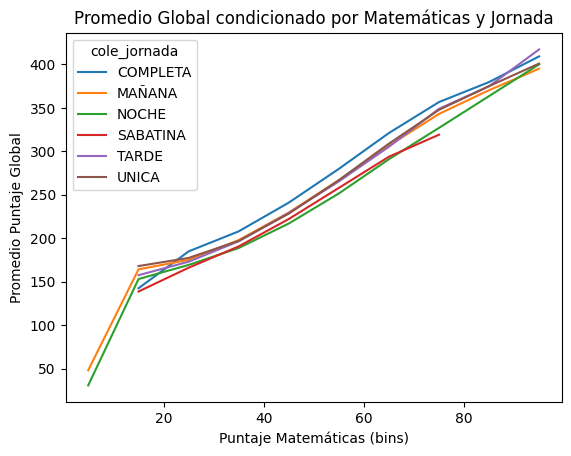

In [ ]:
df['math_bin'] = pd.cut(df['punt_matematicas'], bins=10)

mean_by_bin = df.groupby(['math_bin','cole_jornada'])['punt_global'].mean().reset_index()
mean_by_bin['math_bin_mid'] = mean_by_bin['math_bin'].apply(lambda x: x.mid)


sns.lineplot(
    data=mean_by_bin,
    x='math_bin_mid',
    y='punt_global',
    hue='cole_jornada'
)

plt.xlabel('Puntaje Matemáticas (bins)')
plt.ylabel('Promedio Puntaje Global')
plt.title('Promedio Global condicionado por Matemáticas y Jornada')

plt.show()




HEATMAP de Correlaciones:
* El puntaje global está fuertemente relacionado con todas las áreas, especialmente Ciencias Naturales
* Inglés es la menos correlacionada (0.68-0.71)
* Muestra que la estructura académica es sólida y consistente.Las diferencias por jornada no se deben a que una jornada tenga “estructura distinta” en las relaciones entre materias. Las diferencias son de nivel promedio.



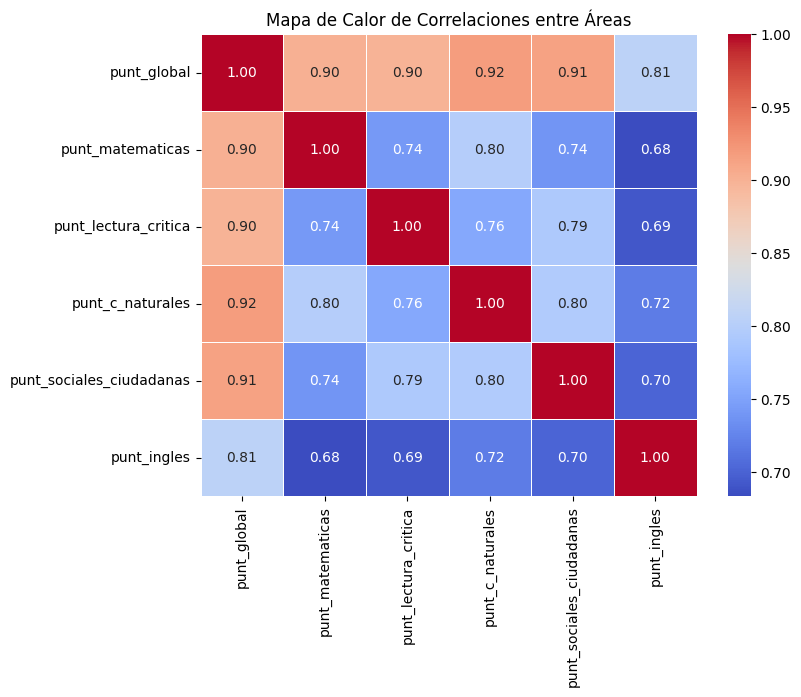

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = [
    'punt_global',
    'punt_matematicas',
    'punt_lectura_critica',
    'punt_c_naturales',
    'punt_sociales_ciudadanas',
    'punt_ingles'
]

corr = df[variables].corr()

plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Mapa de Calor de Correlaciones entre Áreas')
plt.show()


**Conclusiones pregunta 3**

El análisis exploratorio evidencia que existen diferencias sistemáticas en los resultados de Saber 11 según la jornada académica en el departamento del Atlántico. Los boxplots y diagramas de violín muestran un claro desplazamiento en los niveles de desempeño, donde la jornada completa presenta mayores puntajes globales promedio, mientras que la jornada nocturna y sabatina se ubican en niveles inferiores. Los histogramas normalizados indican que estas diferencias corresponden principalmente a un desplazamiento de la distribución y no a cambios en su forma. Adicionalmente, el análisis del puntaje global condicionado por rangos de matemáticas confirma que, para un mismo nivel de desempeño en matemáticas, los estudiantes de jornada completa obtienen sistemáticamente mayores puntajes globales que los de jornada nocturna, evidenciando un efecto de nivel y no una modificación en la estructura de la relación entre competencias. En conjunto, los resultados sugieren que la jornada académica está asociada a diferencias significativas en el desempeño promedio, manteniendo una estructura académica consistente entre grupos.